In [ ]:
pip install pyiqa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.6/212.6 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 125.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 44.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.9/200.9 kB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 91.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 94.4 MB/s eta 0:00:00
  Created wheel for openai-clip: filename=openai_clip-1.0.1

In [ ]:
pip install git+https://github.com/chaofengc/IQA-PyTorch.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/chaofengc/IQA-PyTorch.git to /tmp/pip-req-build-_o01ntmh
  Running command git clone --filter=blob:none --quiet https://github.com/chaofengc/IQA-PyTorch.git /tmp/pip-req-build-_o01ntmh
  Resolved https://github.com/chaofengc/IQA-PyTorch.git to commit 192a821d8fa057be09c9bb48f3461af2f669e8f7
  Preparing metadata (setup.py) ... done


In [ ]:
import pyiqa
import torch
from PIL import Image
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
transform = transforms.ToTensor()

tipus_imatge = ".png"

In [ ]:
# list all available metrics
print(pyiqa.list_models())

['ahiq', 'brisque', 'ckdn', 'clipiqa', 'clipiqa+', 'clipiqa+_rn50_512', 'clipiqa+_vitL14_512', 'cnniqa', 'cw_ssim', 'dbcnn', 'dists', 'fid', 'fsim', 'gmsd', 'hyperiqa', 'ilniqe', 'lpips', 'lpips-vgg', 'mad', 'maniqa', 'maniqa-kadid', 'maniqa-koniq', 'ms_ssim', 'musiq', 'musiq-ava', 'musiq-koniq', 'musiq-paq2piq', 'musiq-spaq', 'nima', 'nima-vgg16-ava', 'niqe', 'nlpd', 'nrqm', 'paq2piq', 'pi', 'pieapp', 'psnr', 'psnry', 'ssim', 'ssimc', 'tres', 'tres-flive', 'tres-koniq', 'uranker', 'vif', 'vsi']


# MUSIQ-KONIQ metric

In [ ]:
# create metric with default setting
iqa_metric = pyiqa.create_metric('musiq-koniq', device=device)

Loading pretrained model MUSIQ from /root/.cache/torch/hub/checkpoints/musiq_koniq_ckpt-e95806b9.pth


In [ ]:
# Check if higher is bettwer or lower is better
print(iqa_metric.lower_better)

False


### MODEL 1

In [ ]:
musiq1_man = []
num_musiq1_man_inc = 0
num_musiq1_man_corr = 0

In [ ]:
path_imatges = "./Image/Model_1/Gender_Specific/"

In [ ]:
# Man

for i in range (148):
  if((i + 1) % 2 != 0):
    if((i + 1) < 10):
      num_img_principi = "02_0" + str(i + 1)
    else: 
      num_img_principi = "02_" + str(i + 1)
    
    genere = "_masculine"

    for j in range(10):
      num_img = num_img_principi

      if((j + 1) < 10):
        num_img += "_0" + str(j + 1)
      else: 
        num_img += "_" + str(j + 1)
      
      img = Image.open(path_imatges + num_img + genere + tipus_imatge)
      
      img_tensor = transform(img)
      reshaped_tensor = torch.unsqueeze(img_tensor, 0).to(device)
      score_nr = iqa_metric(reshaped_tensor)

      img.close()

      if (score_nr < 0 or score_nr > 100):
        num_musiq1_man_inc += 1
      else:
        num_musiq1_man_corr += 1
        musiq1_man.append(score_nr.item())

In [ ]:
# Check if the metric values are inside the 0-100 range
print("Number of incorrect values for man images: " + str(num_musiq1_man_inc))
print("Number of correct values for man images: " + str(num_musiq1_man_corr))

Number of incorrect values for man images: 0
Number of correct values for man images: 740


In [ ]:
# Average value
man_array = np.array(musiq1_man)
mean_man_value = np.mean(man_array)
print("Man mean: " + str(mean_man_value))

Man mean: 65.08571321642077
Man standard deviation: 11.402061006981025


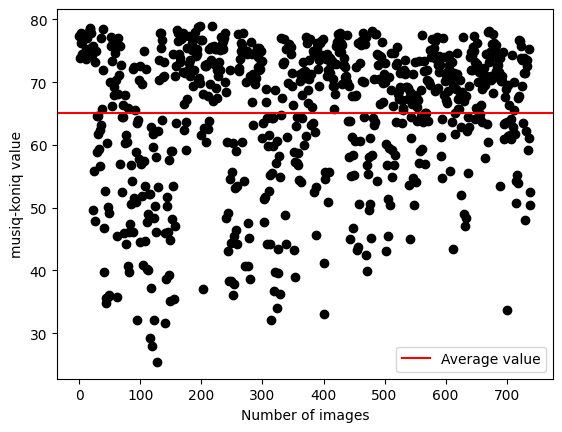

In [ ]:
# Graphic
x_values = range(len(musiq1_man))

plt.plot(x_values, musiq1_man, 'o', color = 'black')
plt.axhline(y=mean_man_value, color='r', linestyle='-', label='Average value')

plt.xlabel('Number of images')
plt.ylabel('musiq-koniq value')
plt.legend()

plt.show()

In [ ]:
musiq1_woman = []
num_musiq1_woman_inc = 0
num_musiq1_woman_corr = 0

In [ ]:
# Woman

for i in range (148):
  if((i + 1) % 2 == 0):
    if((i + 1) < 10):
      num_img_principi = "02_0" + str(i + 1)
    else: 
      num_img_principi = "02_" + str(i + 1)
    
    genere = "_femenine"

    for j in range(10):
      num_img = num_img_principi

      if((j + 1) < 10):
        num_img += "_0" + str(j + 1)
      else: 
        num_img += "_" + str(j + 1)
      
      img = Image.open(path_imatges + num_img + genere + tipus_imatge)
      
      img_tensor = transform(img)
      reshaped_tensor = torch.unsqueeze(img_tensor, 0)
      score_nr = iqa_metric(reshaped_tensor)

      img.close()

      if (score_nr < 0 or score_nr > 100):
        num_musiq1_woman_inc += 1
      else:
        num_musiq1_woman_corr += 1
        musiq1_woman.append(score_nr.item())

In [ ]:
# Check if the metric values are inside the 0-100 range
print("Number of incorrect values for woman images: " + str(num_musiq1_woman_inc))
print("Number of correct values for woman images: " + str(num_musiq1_woman_corr))

Number of incorrect values for woman images: 0
Number of correct values for woman images: 740


In [ ]:
# Average value
woman_array = np.array(musiq1_woman)
mean_woman_value = np.mean(woman_array)
print("Woman mean: " + str(mean_woman_value))

Woman mean: 64.32572564563236
Woman standard deviation: 12.991938336343708


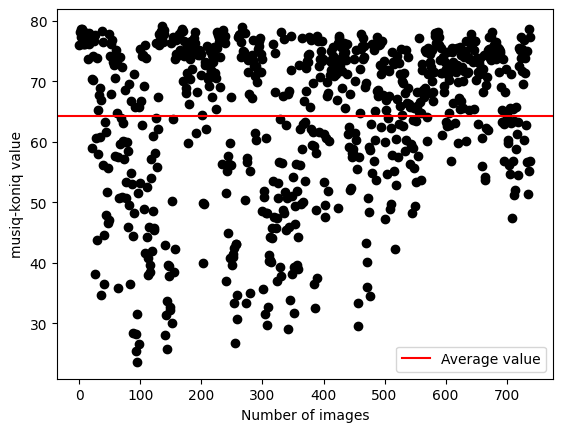

In [ ]:
# Graphic
x_values = range(len(musiq1_woman))

plt.plot(x_values, musiq1_woman, 'o', color = 'black')
plt.axhline(y=mean_woman_value, color='r', linestyle='-', label='Average value')

plt.xlabel('Number of images')
plt.ylabel('musiq-koniq value')
plt.legend()

plt.show()

### MODEL 2

In [ ]:
musiq2_man = []
num_musiq2_man_inc = 0
num_musiq2_man_corr = 0

In [ ]:
path_imatges = "./Images/Model_2/Gender_Specific/"

In [ ]:
# Man

for i in range (148):
  if((i + 1) % 2 != 0):
    if((i + 1) < 10):
      num_img_principi = "04_0" + str(i + 1)
    else: 
      num_img_principi = "04_" + str(i + 1)
    
    genere = "_masculine"

    for j in range(10):
      num_img = num_img_principi

      if((j + 1) < 10):
        num_img += "_0" + str(j + 1)
      else: 
        num_img += "_" + str(j + 1)
      
      img = Image.open(path_imatges + num_img + genere + tipus_imatge)
      
      img_tensor = transform(img)
      reshaped_tensor = torch.unsqueeze(img_tensor, 0).to(device)
      score_nr = iqa_metric(reshaped_tensor)

      img.close()

      if (score_nr < 0 or score_nr > 100):
        num_musiq2_man_inc += 1
      else:
        num_musiq2_man_corr += 1
        musiq2_man.append(score_nr.item())

In [ ]:
# Check if the metric values are inside the 0-100 range
print("Number of incorrect values for man images: " + str(num_musiq2_man_inc))
print("Number of correct values for man images: " + str(num_musiq2_man_corr))

Number of incorrect values for man images: 0
Number of correct values for man images: 740


In [ ]:
# Average value
man_array = np.array(musiq2_man)
mean_man_value = np.mean(man_array)
print("Man mean: " + str(mean_man_value))

Man mean: 69.0537546106287
Man standard deviation: 8.723233236208484


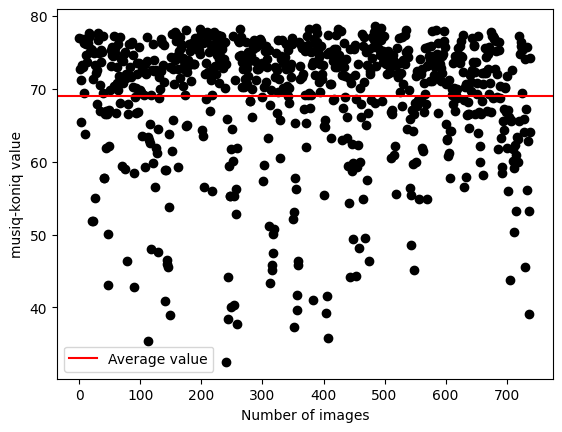

In [ ]:
# Graphic
x_values = range(len(musiq2_man))

plt.plot(x_values, musiq2_man, 'o', color='black')
plt.axhline(y=mean_man_value, color='r', linestyle='-', label='Average value')

plt.xlabel('Number of images')
plt.ylabel('musiq-koniq value')
plt.legend()

plt.show()

In [ ]:
musiq2_woman = []
num_musiq2_woman_inc = 0
num_musiq2_woman_corr = 0

In [ ]:
# Woman

for i in range (148):
  if((i + 1) % 2 == 0):
    if((i + 1) < 10):
      num_img_principi = "04_0" + str(i + 1)
    else: 
      num_img_principi = "04_" + str(i + 1)
    
    genere = "_femenine"

    for j in range(10):
      num_img = num_img_principi

      if((j + 1) < 10):
        num_img += "_0" + str(j + 1)
      else: 
        num_img += "_" + str(j + 1)
      
      img = Image.open(path_imatges + num_img + genere + tipus_imatge)
      
      img_tensor = transform(img)
      reshaped_tensor = torch.unsqueeze(img_tensor, 0)
      score_nr = iqa_metric(reshaped_tensor)

      img.close()

      if (score_nr < 0 or score_nr > 100):
        num_musiq2_woman_inc += 1
      else:
        num_musiq2_woman_corr += 1
        musiq2_woman.append(score_nr.item())

In [ ]:
# Check if the metric values are inside the 0-100 range
print("Number of incorrect values for woman images: " + str(num_musiq2_woman_inc))
print("Number of correct values for woman images: " + str(num_musiq2_woman_corr))

Number of incorrect values for woman images: 0
Number of correct values for woman images: 740


In [ ]:
# Average value
woman_array = np.array(musiq2_woman)
mean_woman_value = np.mean(woman_array)
print("Woman mean: " + str(mean_woman_value))

Woman mean: 69.34102220793028
Woman standard deviation: 9.761524194990924


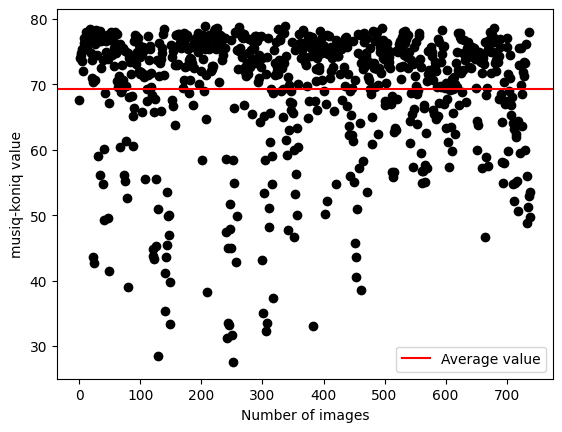

In [ ]:
# Graphic
x_values = range(len(musiq2_woman))

plt.plot(x_values, musiq2_woman, 'o', color='black')
plt.axhline(y=mean_woman_value, color='r', linestyle='-', label='Average value')

plt.xlabel('Number of images')
plt.ylabel('musiq-koniq value')
plt.legend()

plt.show()

# CLIPIQA+_RN50_512 metric

In [ ]:
# create metric with default setting
iqa_metric = pyiqa.create_metric('clipiqa+_rn50_512', device=device)

100%|███████████████████████████████████████| 244M/244M [00:03<00:00, 65.6MiB/s]


Downloading: "https://github.com/chaofengc/IQA-PyTorch/releases/download/v0.1-weights/CLIPIQA+_RN50_512-89f5d940.pth" to /root/.cache/torch/hub/checkpoints/CLIPIQA+_RN50_512-89f5d940.pth



100%|██████████| 309k/309k [00:00<00:00, 77.0MB/s]

Loading pretrained model CLIPIQA from /root/.cache/torch/hub/checkpoints/CLIPIQA+_RN50_512-89f5d940.pth


In [ ]:
# Check if higher is bettwer or lower is better
print(iqa_metric.lower_better)

False


### MODEL 1

In [ ]:
clipiqa1_man = []
num_clipiqa1_man_inc = 0
num_clipiqa1_man_corr = 0

In [ ]:
path_imatges = "./Images/Model_1/Gender_Specific/"

In [ ]:
# Man

for i in range (148):
  if((i + 1) % 2 != 0):
    if((i + 1) < 10):
      num_img_principi = "02_0" + str(i + 1)
    else: 
      num_img_principi = "02_" + str(i + 1)
    
    genere = "_masculine"

    for j in range(10):
      num_img = num_img_principi

      if((j + 1) < 10):
        num_img += "_0" + str(j + 1)
      else: 
        num_img += "_" + str(j + 1)
      
      img = Image.open(path_imatges + num_img + genere + tipus_imatge)
      
      img_tensor = transform(img)
      reshaped_tensor = torch.unsqueeze(img_tensor, 0).to(device)
      score_nr = iqa_metric(reshaped_tensor)

      img.close()

      if (score_nr < 0 or score_nr > 1):
        num_clipiqa1_man_inc += 1
      else:
        num_clipiqa1_man_corr += 1
        clipiqa1_man.append(score_nr.item())

In [ ]:
# Check if the metric values are inside the 0-1 range
print("Number of incorrect values for man images: " + str(num_clipiqa1_man_inc))
print("Number of correct values for man images: " + str(num_clipiqa1_man_corr))

Number of incorrect values for man images: 0
Number of correct values for man images: 740


In [ ]:
# Average value
man_array = np.array(clipiqa1_man)
mean_man_value = np.mean(man_array)
print("Man mean: " + str(mean_man_value))

Man mean: 0.4618791377121532
Man standard deviation: 0.16350234086257628


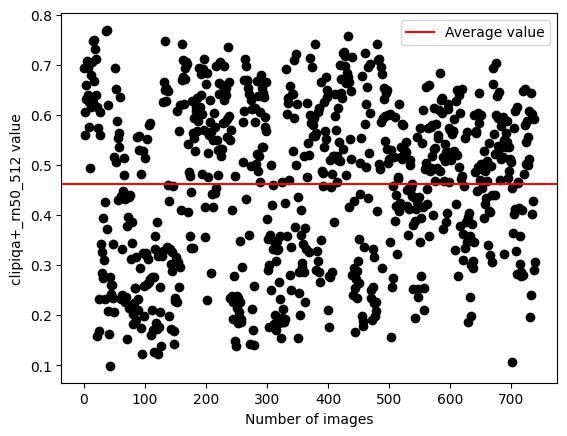

In [ ]:
# Graphic
x_values = range(len(clipiqa1_man))

plt.plot(x_values, clipiqa1_man, 'o', color = 'black')
plt.axhline(y=mean_man_value, color='r', linestyle='-', label='Average value')

plt.xlabel('Number of images')
plt.ylabel('clipiqa+_rn50_512 value')
plt.legend()

plt.show()

In [ ]:
clipiqa1_woman = []
num_clipiqa1_woman_inc = 0
num_clipiqa1_woman_corr = 0

In [ ]:
# Woman

for i in range (148):
  if((i + 1) % 2 == 0):
    if((i + 1) < 10):
      num_img_principi = "02_0" + str(i + 1)
    else: 
      num_img_principi = "02_" + str(i + 1)
    
    genere = "_femenine"

    for j in range(10):
      num_img = num_img_principi

      if((j + 1) < 10):
        num_img += "_0" + str(j + 1)
      else: 
        num_img += "_" + str(j + 1)
      
      img = Image.open(path_imatges + num_img + genere + tipus_imatge)
      
      img_tensor = transform(img)
      reshaped_tensor = torch.unsqueeze(img_tensor, 0)
      score_nr = iqa_metric(reshaped_tensor)

      img.close()

      if (score_nr < 0 or score_nr > 1):
        num_clipiqa1_woman_inc += 1
      else:
        num_clipiqa1_woman_corr += 1
        clipiqa1_woman.append(score_nr.item())

In [ ]:
# Check if the metric values are inside the 0-1 range
print("Number of incorrect values for woman images: " + str(num_clipiqa1_woman_inc))
print("Number of correct values for woman images: " + str(num_clipiqa1_woman_corr))

Number of incorrect values for woman images: 0
Number of correct values for woman images: 740


In [ ]:
# Average value
woman_array = np.array(clipiqa1_woman)
mean_woman_value = np.mean(woman_array)
print("Woman mean: " + str(mean_woman_value))

Woman mean: 0.44315040749875273
Woman standard deviation: 0.16528696071641052


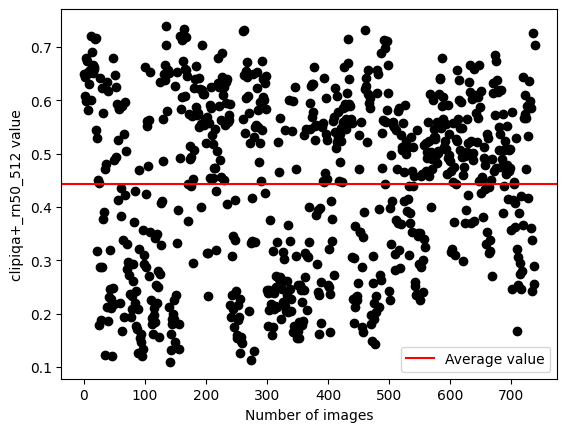

In [ ]:
# Graphic
x_values = range(len(clipiqa1_woman))

plt.plot(x_values, clipiqa1_woman, 'o', color = 'black')
plt.axhline(y=mean_woman_value, color='r', linestyle='-', label='Average value')

plt.xlabel('Number of images')
plt.ylabel('clipiqa+_rn50_512 value')
plt.legend()

plt.show()

### MODEL 2

In [ ]:
clipiqa2_man = []
num_clipiqa2_man_inc = 0
num_clipiqa2_man_corr = 0

In [ ]:
path_imatges = "./Images/Model_2/Gender_Specific/"

In [ ]:
# Man

for i in range (148):
  if((i + 1) % 2 != 0):
    if((i + 1) < 10):
      num_img_principi = "04_0" + str(i + 1)
    else: 
      num_img_principi = "04_" + str(i + 1)
    
    genere = "_masculine"

    for j in range(10):
      num_img = num_img_principi

      if((j + 1) < 10):
        num_img += "_0" + str(j + 1)
      else: 
        num_img += "_" + str(j + 1)
      
      img = Image.open(path_imatges + num_img + genere + tipus_imatge)
      
      img_tensor = transform(img)
      reshaped_tensor = torch.unsqueeze(img_tensor, 0).to(device)
      score_nr = iqa_metric(reshaped_tensor)

      img.close()

      if (score_nr < 0 or score_nr > 1):
        num_clipiqa2_man_inc += 1
      else:
        num_clipiqa2_man_corr += 1
        clipiqa2_man.append(score_nr.item())

In [ ]:
# Check if the metric values are inside the 0-1 range
print("Number of incorrect values for man images: " + str(num_clipiqa2_man_inc))
print("Number of correct values for man images: " + str(num_clipiqa2_man_corr))

Number of incorrect values for man images: 0
Number of correct values for man images: 740


In [ ]:
# Average value
man_array = np.array(clipiqa2_man)
mean_man_value = np.mean(man_array)
print("Man mean: " + str(mean_man_value))

Man mean: 0.5291589636657689
Man standard deviation: 0.135034910375768


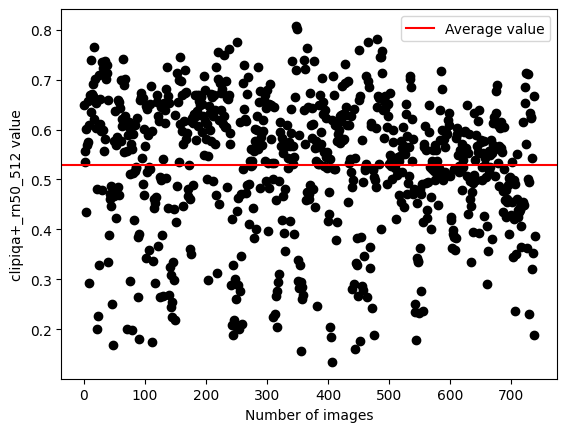

In [ ]:
# Graphic
x_values = range(len(clipiqa2_man))

plt.plot(x_values, clipiqa2_man, 'o', color='black')
plt.axhline(y=mean_man_value, color='r', linestyle='-', label='Average value')

plt.xlabel('Number of images')
plt.ylabel('clipiqa+_rn50_512 value')
plt.legend()

plt.show()

In [ ]:
clipiqa2_woman = []
num_clipiqa2_woman_inc = 0
num_clipiqa2_woman_corr = 0

In [ ]:
path_imatges = "./Images/Model_2/Gender_Specific/"

In [ ]:
# woman

for i in range (148):
  if((i + 1) % 2 == 0):
    if((i + 1) < 10):
      num_img_principi = "04_0" + str(i + 1)
    else: 
      num_img_principi = "04_" + str(i + 1)
    
    genere = "_femenine"

    for j in range(10):
      num_img = num_img_principi

      if((j + 1) < 10):
        num_img += "_0" + str(j + 1)
      else: 
        num_img += "_" + str(j + 1)
      
      img = Image.open(path_imatges + num_img + genere + tipus_imatge)
      
      img_tensor = transform(img)
      reshaped_tensor = torch.unsqueeze(img_tensor, 0)
      score_nr = iqa_metric(reshaped_tensor)

      img.close()

      if (score_nr < 0 or score_nr > 1):
        num_clipiqa2_woman_inc += 1
      else:
        num_clipiqa2_woman_corr += 1
        clipiqa2_woman.append(score_nr.item())

In [ ]:
# Check if the metric values are inside the 0-1 range
print("Number of incorrect values for woman images: " + str(num_clipiqa2_woman_inc))
print("Number of correct values for woman images: " + str(num_clipiqa2_woman_corr))

Number of incorrect values for woman images: 0
Number of correct values for woman images: 740


In [ ]:
# Average value
woman_array = np.array(clipiqa2_woman)
mean_woman_value = np.mean(woman_array)
print("Woman mean: " + str(mean_woman_value))

Woman mean: 0.5242764410134908
Woman standard deviation: 0.13047091342089961


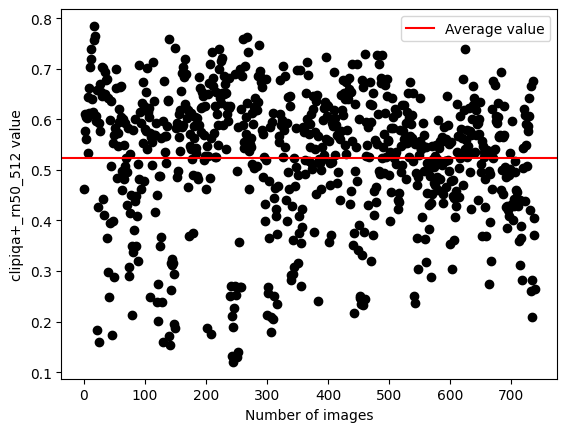

In [ ]:
# Graphic
x_values = range(len(clipiqa2_woman))

plt.plot(x_values, clipiqa2_woman, 'o', color='black')
plt.axhline(y=mean_woman_value, color='r', linestyle='-', label='Average value')

plt.xlabel('Number of images')
plt.ylabel('clipiqa+_rn50_512 value')
plt.legend()

plt.show()

# DBCNN metric

In [ ]:
# Create metric with default setting
iqa_metric = pyiqa.create_metric('dbcnn', device=device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:01<00:00, 286MB/s]


Downloading: "https://github.com/chaofengc/IQA-PyTorch/releases/download/v0.1-weights/DBCNN_KonIQ10k-254e8241.pth" to /root/.cache/torch/hub/checkpoints/DBCNN_KonIQ10k-254e8241.pth



100%|██████████| 58.4M/58.4M [00:03<00:00, 19.5MB/s]


Loading pretrained model DBCNN from /root/.cache/torch/hub/checkpoints/DBCNN_KonIQ10k-254e8241.pth


In [ ]:
# Check if higher is bettwer or lower is better
print(iqa_metric.lower_better)

False


### MODEL 1

In [ ]:
dbcnn1_man = []
num_dbcnn1_man_inc = 0
num_dbcnn1_man_corr = 0

In [ ]:
path_imatges = "./Images/Model_1/Gender_Specific/"

In [ ]:
# Man

for i in range (148):
  if((i + 1) % 2 != 0):
    if((i + 1) < 10):
      num_img_principi = "02_0" + str(i + 1)
    else: 
      num_img_principi = "02_" + str(i + 1)
    
    genere = "_masculine"

    for j in range(10):
      num_img = num_img_principi

      if((j + 1) < 10):
        num_img += "_0" + str(j + 1)
      else: 
        num_img += "_" + str(j + 1)
      
      img = Image.open(path_imatges + num_img + genere + tipus_imatge)
      
      img_tensor = transform(img)
      reshaped_tensor = torch.unsqueeze(img_tensor, 0).to(device)
      score_nr = iqa_metric(reshaped_tensor)

      img.close()

      if (score_nr < 0 or score_nr > 100):
        num_dbcnn1_man_inc += 1
      else:
        num_dbcnn1_man_corr += 1
        dbcnn1_man.append(score_nr.item())

In [ ]:
# Check if the metric values are inside the 0-100 range
print("Number of incorrect values for man images: " + str(num_dbcnn1_man_inc))
print("Number of correct values for man images: " + str(num_dbcnn1_man_corr))

Number of incorrect values for man images: 0
Number of correct values for man images: 740


In [ ]:
# Average value
man_array = np.array(dbcnn1_man)
mean_man_value = np.mean(man_array)
print("Man mean: " + str(mean_man_value))

Man mean: 54.23128199448457
Man standard deviation: 13.784773416318878


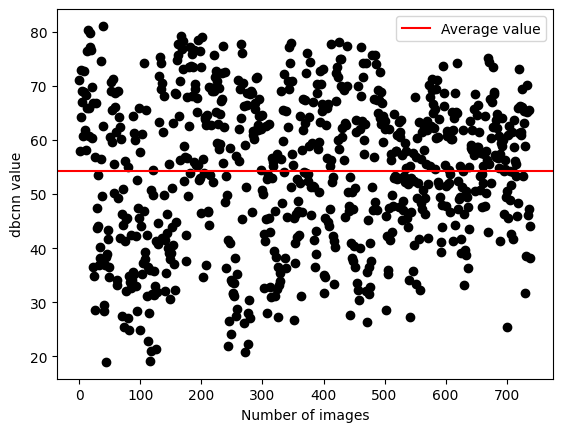

In [ ]:
# Graphic
x_values = range(len(dbcnn1_man))

plt.plot(x_values, dbcnn1_man, 'o', color = 'black')
plt.axhline(y=mean_man_value, color='r', linestyle='-', label='Average value')

plt.xlabel('Number of images')
plt.ylabel('dbcnn value')
plt.legend()

plt.show()

In [ ]:
dbcnn1_woman = []
num_dbcnn1_woman_inc = 0
num_dbcnn1_woman_corr = 0

In [ ]:
# Woman

for i in range (148):
  if((i + 1) % 2 == 0):
    if((i + 1) < 10):
      num_img_principi = "02_0" + str(i + 1)
    else: 
      num_img_principi = "02_" + str(i + 1)
    
    genere = "_femenine"

    for j in range(10):
      num_img = num_img_principi

      if((j + 1) < 10):
        num_img += "_0" + str(j + 1)
      else: 
        num_img += "_" + str(j + 1)
      
      img = Image.open(path_imatges + num_img + genere + tipus_imatge)
      
      img_tensor = transform(img)
      reshaped_tensor = torch.unsqueeze(img_tensor, 0)
      score_nr = iqa_metric(reshaped_tensor)

      img.close()

      if (score_nr < 0 or score_nr > 100):
        num_dbcnn1_woman_inc += 1
      else:
        num_dbcnn1_woman_corr += 1
        dbcnn1_woman.append(score_nr.item())

In [ ]:
# Check if the metric values are inside the 0-100 range
print("Number of incorrect values for woman images: " + str(num_dbcnn1_woman_inc))
print("Number of correct values for woman images: " + str(num_dbcnn1_woman_corr))

Number of incorrect values for woman images: 0
Number of correct values for woman images: 740


In [ ]:
# Average value
woman_array = np.array(dbcnn1_woman)
mean_woman_value = np.mean(woman_array)
print("Woman mean: " + str(mean_woman_value))

Woman mean: 52.80476987941845
Woman standard deviation: 14.526293460518152


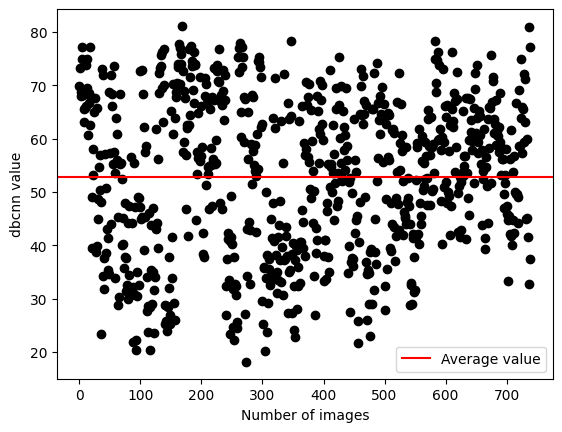

In [ ]:
# Graphic
x_values = range(len(dbcnn1_woman))

plt.plot(x_values, dbcnn1_woman, 'o', color='black')
plt.axhline(y=mean_woman_value, color='r', linestyle='-', label='Average value')

plt.xlabel('Number of images')
plt.ylabel('dbcnn value')
plt.legend()

plt.show()

# MODEL 2

In [ ]:
dbcnn2_man = []
num_dbcnn2_man_inc = 0
num_dbcnn2_man_corr = 0

In [ ]:
path_imatges = "./Images/Model_2/Geder_Specific/"

In [ ]:
# Man

for i in range (148):
  if((i + 1) % 2 != 0):
    if((i + 1) < 10):
      num_img_principi = "04_0" + str(i + 1)
    else: 
      num_img_principi = "04_" + str(i + 1)
    
    genere = "_masculine"

    for j in range(10):
      num_img = num_img_principi

      if((j + 1) < 10):
        num_img += "_0" + str(j + 1)
      else: 
        num_img += "_" + str(j + 1)
      
      img = Image.open(path_imatges + num_img + genere + tipus_imatge)
      
      img_tensor = transform(img)
      reshaped_tensor = torch.unsqueeze(img_tensor, 0).to(device)
      score_nr = iqa_metric(reshaped_tensor)

      img.close()

      if (score_nr < 0 or score_nr > 100):
        num_dbcnn2_man_inc += 1
      else:
        num_dbcnn2_man_corr += 1
        dbcnn2_man.append(score_nr.item())

In [ ]:
# Check if the metric values are inside the 0-100 range
print("Number of incorrect values for man images: " + str(num_dbcnn2_man_inc))
print("Number of correct values for man images: " + str(num_dbcnn2_man_corr))

Number of incorrect values for man images: 0
Number of correct values for man images: 740


In [ ]:
# Average value
man_array = np.array(dbcnn2_man)
mean_man_value = np.mean(man_array)
print("Man mean: " + str(mean_man_value))

Man mean: 58.53800969768215
Man standard deviation: 11.881493782778776


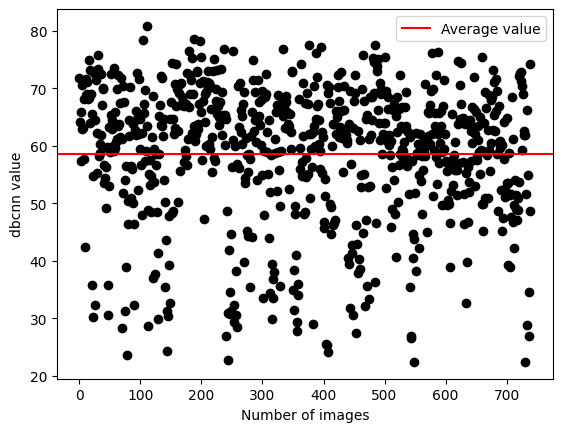

In [ ]:
# Graphic
x_values = range(len(dbcnn2_man))

plt.plot(x_values, dbcnn2_man, 'o', color='black')
plt.axhline(y=mean_man_value, color='r', linestyle='-', label='Average value')

plt.xlabel('Number of images')
plt.ylabel('dbcnn value')
plt.legend()

plt.show()

In [ ]:
dbcnn2_woman = []
num_dbcnn2_woman_inc = 0
num_dbcnn2_woman_corr = 0

In [ ]:
# Woman

for i in range (148):
  if((i + 1) % 2 == 0):
    if((i + 1) < 10):
      num_img_principi = "04_0" + str(i + 1)
    else: 
      num_img_principi = "04_" + str(i + 1)
    
    genere = "_femenine"

    for j in range(10):
      num_img = num_img_principi

      if((j + 1) < 10):
        num_img += "_0" + str(j + 1)
      else: 
        num_img += "_" + str(j + 1)
      
      img = Image.open(path_imatges + num_img + genere + tipus_imatge)
      
      img_tensor = transform(img)
      reshaped_tensor = torch.unsqueeze(img_tensor, 0)
      score_nr = iqa_metric(reshaped_tensor)

      img.close()

      if (score_nr < 0 or score_nr > 100):
        num_dbcnn2_woman_inc += 1
      else:
        num_dbcnn2_woman_corr += 1
        dbcnn2_woman.append(score_nr.item())

In [ ]:
# Check if the metric values are inside the 0-100 range
print("Number of incorrect values for woman images: " + str(num_dbcnn2_woman_inc))
print("Number of correct values for woman images: " + str(num_dbcnn2_woman_corr))

Number of incorrect values for woman images: 0
Number of correct values for woman images: 740


In [ ]:
# Average value
woman_array = np.array(dbcnn2_woman)
mean_woman_value = np.mean(woman_array)
print("Woman mean: " + str(mean_woman_value))

Woman mean: 58.414223918399294
Woman standard deviation: 12.334637734150776


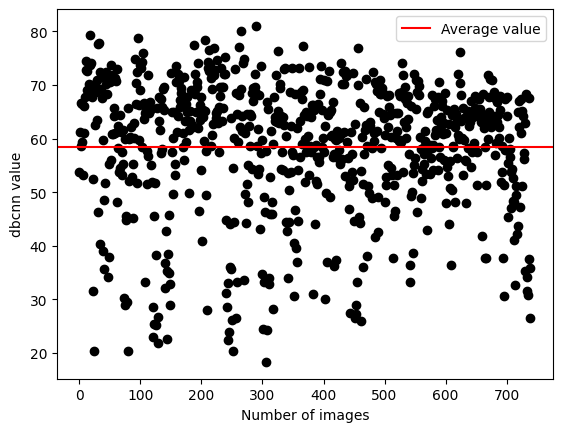

In [ ]:
# Graphic
x_values = range(len(dbcnn2_woman))

plt.plot(x_values, dbcnn2_woman, 'o', color='black')
plt.axhline(y=mean_woman_value, color='r', linestyle='-', label='Average value')

plt.xlabel('Number of images')
plt.ylabel('dbcnn value')
plt.legend()

plt.show()